<a href="https://colab.research.google.com/github/jiiwon129/ESAA/blob/main/OB/%EC%97%B0%EC%8A%B5%20%EB%AC%B8%EC%A0%9C/09_12_%EC%84%B8%EC%85%98_%EB%AA%A8%EB%8D%B8%ED%9B%88%EB%A0%A8_%EC%97%B0%EC%8A%B5%EB%AC%B8%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **모델 훈련 연습 문제**
___
- 출처 : 핸즈온 머신러닝 Ch04 연습문제 1, 5, 9, 10
- 개념 문제의 경우 텍스트 셀을 추가하여 정답을 적어주세요.

### **1. 수백만 개의 특성을 가진 훈련 세트에서는 어떤 선형 회귀 알고리즘을 사용할 수 있을까요?**
___

선형 회귀 알고리즘의 종류

1. 정규방정식
  - 역행렬을 계산하는 계산 복잡도가 일반적으로 $O(n^{2.4}) \sim O(n^3)$
  - 샘플 수와 특성 수가 많아질 수록 복잡해짐

2. 배치 경사 하강법
  - 특성 수에 민감하지 않다는 장점 존재
  - 하지만 전체 데이터 세트를 사용하기 떄문에 샘플 수가 클 경우 느림

3. 확률적 경사 하강법
  - 매 스텝에서 한 개의 샘플을 무작위로 선택 후, 그 하나의 샘플에 대한 Gradient를 계산하는 방법

4. 미니매치 경사 하강법
  - SGD(확률적 경사 하강법)의 변형 방법으로, 미니배치라 부르는 작은 샘플 세트에 대해 Gradient 계산

즉, 수십만 개의 특성에서 선형 회귀를 훈련시키려면 정규방정식이나 SVD 분해보다 **경사 하강법**을 사용하는 편이 빠름

### **2. 배치 경사 하강법을 사용하고 에포크마다 검증 오차를 그래프로 나타내봤습니다. 검증 오차가 일정하게 상승되고 있다면 어떤 일이 일어나고 있는 걸까요? 이 문제를 어떻게 해결할 수 있나요?**
___

#### 검증 오차가 상승하는 문제는 곧 **과대적합**을 시사!

#### 과대적합을 해결하기 위한 방법

1. 모델의 복잡도 줄이기
- 선형 모델의 경우, 다항식의 차수를 낮춤

2. 규제(Regularization) 적옹
- L1 규제(Lasso): 일부 가중치를 0으로 변환
- L2 규제(Ridge): 가중치의 제곱합을 최소화

3. 조기 종료(Early Stopping)
- 훈련 과정에서 검증 오차가 최소가 되는 지점을 찾으면 더 이상 훈련을 진행하지 않고 멈추는 방법

4. 교차 검증(Cross-validation)
- 훈련 데이터를 여러 Fold로 나누어 훈련과 검증을 반복


### **3. 릿지 회귀를 사용했을 때 훈련 오차가 검증 오차가 거의 비슷하고 둘 다 높았습니다. 이 모델에는 높은 편향이 문제인가요, 아니면 높은 분산이 문제인가요? 규제 하이퍼파라미터 $\alpha$를 증가시켜야 할까요 아니면 줄여야 할까요?**
___




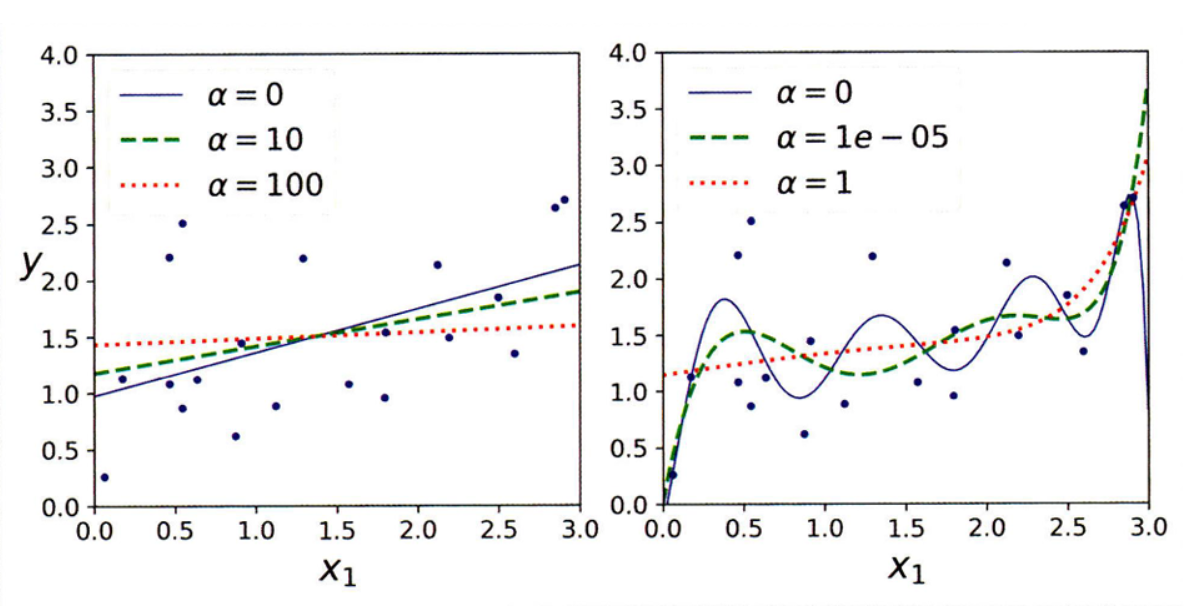

위는 $\alpha$에 따른 변화를 나타낸 그래프이다.

$\alpha$를 증가시킬수록 직선에 가까워지는 것을 확인!

--> 즉 $\alpha$가 증가하면서 모델이 너무 단순해져 훈련 데이터를 충분히 표현해내지 못함.
- 모델의 분산은 감소, 편향은 증가함.

훈련 오차와 검증 오차가 모두 높고 비슷하다는 것은 모델이 데이터의 기본 패턴을 제대로 학습하지 못함을 의미하며, 이는 곧 과소적합의 문제로 이어짐.

#### 따라서 높은 편향의 문제이다.

#### 높은 편향의 해결책

- 릿지 회귀의 규제 파라미터인 $\alpha$의 값을 줄여야 함.

--> $\alpha$를 줄이면 규제의 강도가 약해져 모델이 훈련 데이터에 더 잘 맞출 수 있는 유연성이 높아짐

즉, 모델의 복잡도를 높여 편향을 줄이고 훈련 오차를 낮추는 효과 존재

### **4. 다음과 같이 사용해야 하는 이유는?**
___
- 평범한 선형 회귀(즉, 아무런 규제가 없는 모델) 대신 릿지 회귀
- 릿지 회귀 대신 라쏘 회귀
- 라쏘 회귀 대신 엘라스틱넷

---

1. 평범한 선형 회귀 대신 릿지 회귀
- 높은 분산 문제를 해결
- L2 규제는 곧 가중치들을 0에 가깝게 줄여 과대적합을 억제하고 모델의 안정성을 높일 수 있음.

2. 릿지 회귀 대신 라쏘 회귀
- 중요한 특성 선택

:  릿지 회귀는 모든 특성을 사용하지만, 라쏘 회귀는 L1 규제를 사용하여 중요하지 않은 특성의 가중치를 0으로 만들어 제거함

--> 간결한 모델 생성

3. 라쏘 회귀 대신 엘라스틱넷

- 라쏘 회귀의 단점 보완

:  라쏘 회귀는 특성이 많고 서로 강하게 상관관계가 있을 때 문제가 발생

- L1 + L2 규제

: L1 + L2 규제: 엘라스틱넷은 라쏘의 L1 규제와 릿지의 L2 규제를 결합한 방식

L1 규제의 장점인 특성 선택 기능을 유지하면서, L2 규제의 장점인 상관관계가 높은 특성들을 모두 포함하여 가중치를 줄임.

### **추가) 조기 종료를 사용한 배치 경사 하강법으로 iris 데이터를 활용해 소프트맥스 회귀를 구현해보세요(사이킷런은 사용하지 마세요)**


---



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris = load_iris()

In [2]:
X = iris["data"][:, (2, 3)]
y = iris["target"]

모든 샘플에 편향 추가

In [3]:
X_with_bias = np.c_[np.ones([len(X), 1]), X]

일정한 결과 유지를 위해 랜덤시드 설정

In [4]:
np.random.seed(2042)

훈련 및 검증 데이터 분리
- train_test_split() 함수 사용 가능

In [5]:
test_ratio = 0.2
validation_ratio = 0.2
total_size = len(X_with_bias)

test_size = int(total_size * test_ratio)
validation_size = int(total_size * validation_ratio)
train_size = total_size - test_size - validation_size

rnd_indices = np.random.permutation(total_size)

X_train = X_with_bias[rnd_indices[:train_size]]
y_train = y[rnd_indices[:train_size]]
X_valid = X_with_bias[rnd_indices[train_size:-test_size]]
y_valid = y[rnd_indices[train_size:-test_size]]
X_test = X_with_bias[rnd_indices[-test_size:]]
y_test = y[rnd_indices[-test_size:]]

타깃은 클래스 인덱스(0, 1, 2)이지만 소프트맥스 회귀 모델을 훈련시키기 위해 필요한 것은 `타깃 클래스의 확률`!
- 각 샘플에서 확률이 1인 타깃 클래스를 제외한 다른 클래스의 확률은 0
- 클래스 인덱스를 원-핫 벡터로 바꾸는 간단한 함수 작성

In [6]:
def to_one_hot(y):
    n_classes = y.max() + 1
    m = len(y)
    Y_one_hot = np.zeros((m, n_classes))
    Y_one_hot[np.arange(m), y] = 1
    return Y_one_hot

10개의 샘플로 함수 테스트

In [9]:
y_train[:10]

array([0, 1, 2, 1, 1, 0, 1, 1, 1, 0])

In [10]:
to_one_hot(y_train[:10])

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

훈련 세트와 테스트 테스의 타깃 클래스 확률을 담은 행렬 생성

In [12]:
Y_train_one_hot = to_one_hot(y_train)
Y_valid_one_hot = to_one_hot(y_valid)
Y_test_one_hot = to_one_hot(y_test)

softmax 함수 생성

In [13]:
def softmax(logits):
    exps = np.exp(logits)
    exp_sums = np.sum(exps, axis=1, keepdims=True)
    return exps / exp_sums

입력 및 출력의 개수 정의

In [18]:
n_inputs = X_train.shape[1] # == 3 (특성 2개와 편향)
n_outputs = len(np.unique(y_train))   # == 3 (3개의 붓꽃 클래스)

비용함수 공식 구현:

$J(\mathbf{\Theta}) =\dfrac{1}{m}\sum\limits_{i=1}^{m}\sum\limits_{k=1}^{K}{y_k^{(i)}\log\left(\hat{p}_k^{(i)}\right)}$

In [19]:
eta = 0.01
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    if iteration % 500 == 0:
        loss = -np.mean(np.sum(Y_train_one_hot * np.log(Y_proba + epsilon), axis=1))
        print(iteration, loss)
    error = Y_proba - Y_train_one_hot
    gradients = 1/m * X_train.T.dot(error)
    Theta = Theta - eta * gradients

0 5.446205811872683
500 0.8350062641405651
1000 0.6878801447192402
1500 0.6012379137693314
2000 0.5444496861981872
2500 0.5038530181431525
3000 0.4729228972192248
3500 0.44824244188957774
4000 0.4278651093928793
4500 0.41060071429187134
5000 0.3956780375390374


모델 파라미터 확인

In [20]:
Theta

array([[ 3.32094157, -0.6501102 , -2.99979416],
       [-1.1718465 ,  0.11706172,  0.10507543],
       [-0.70224261, -0.09527802,  1.4786383 ]])

검증 세트에 대한 예측과 정확도 확인

In [21]:
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

np.float64(0.9666666666666667)

규제 추가 및 학습률 증가

In [22]:
eta = 0.1
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7
alpha = 0.1  # 규제 하이퍼파라미터

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    if iteration % 500 == 0:
        xentropy_loss = -np.mean(np.sum(Y_train_one_hot * np.log(Y_proba + epsilon), axis=1))
        l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
        loss = xentropy_loss + alpha * l2_loss
        print(iteration, loss)
    error = Y_proba - Y_train_one_hot
    gradients = 1/m * X_train.T.dot(error) + np.r_[np.zeros([1, n_outputs]), alpha * Theta[1:]]
    Theta = Theta - eta * gradients

0 6.629842469083912
500 0.5339667976629505
1000 0.503640075014894
1500 0.4946891059460322
2000 0.4912968418075477
2500 0.48989924700933296
3000 0.4892990598451198
3500 0.48903512443978603
4000 0.4889173621830818
4500 0.4888643337449303
5000 0.4888403120738818


추가된 페널티 때문에 손실이 조금 더 커보임!

In [23]:
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

np.float64(1.0)

하지만 잘 작동함을 확인

조기종료 추가 코드

In [24]:
eta = 0.1
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7
alpha = 0.1  # 규제 하이퍼파라미터
best_loss = np.inf

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    error = Y_proba - Y_train_one_hot
    gradients = 1/m * X_train.T.dot(error) + np.r_[np.zeros([1, n_outputs]), alpha * Theta[1:]]
    Theta = Theta - eta * gradients

    logits = X_valid.dot(Theta)
    Y_proba = softmax(logits)
    xentropy_loss = -np.mean(np.sum(Y_valid_one_hot * np.log(Y_proba + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
    loss = xentropy_loss + alpha * l2_loss
    if iteration % 500 == 0:
        print(iteration, loss)
    if loss < best_loss:
        best_loss = loss
    else:
        print(iteration - 1, best_loss)
        print(iteration, loss, "조기 종료!")
        break

0 4.7096017363419875
500 0.5739711987633519
1000 0.5435638529109128
1500 0.5355752782580261
2000 0.5331959249285544
2500 0.5325946767399383
2765 0.5325460966791898
2766 0.5325460971327977 조기 종료!


In [25]:
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

np.float64(1.0)

전체 데이터셋에 대한 모델의 예측 그래프 생성

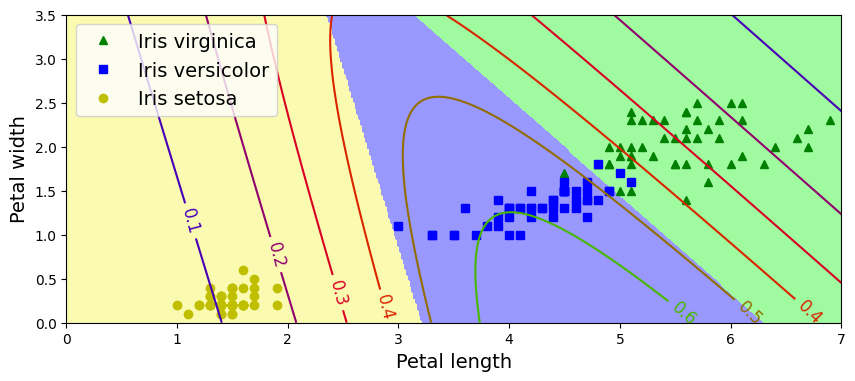

In [26]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
X_new_with_bias = np.c_[np.ones([len(X_new), 1]), X_new]

logits = X_new_with_bias.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

zz1 = Y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()

테스트 세트에 대한 모델의 최종 정확도 측정

In [27]:
logits = X_test.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_test)
accuracy_score

np.float64(0.9333333333333333)